In [17]:
import yaml
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from scipy.signal import find_peaks,peak_widths

In [3]:
configFileName = "/home/fanghan/Work/SPEBT/Develop/github-pyMatcal/configs/config.yml"
with open(configFileName, "r") as stream:
    try:
        yamlConfig = yaml.safe_load(stream)
    except yaml.YAMLError as err:
        print(err)

# Read in the geometry
try:
    systemGeom = np.asarray(yamlConfig["detector geometry"])
    sensGeomIds = np.asarray(yamlConfig["detector"]["sensitive geometry indices"])
    detSubs = np.asarray(yamlConfig["detector"]["crystal n subdivision xyz"])
    # Calculate Image space N subdivision and size.
    imageDims = np.asarray(yamlConfig["image"]["dimension xyz"])
    imageVxpms = np.asarray(yamlConfig["image"]["voxel per mm xyz"])
    imageSubs = np.asarray(yamlConfig["image"]["subdivision xyz"])
    angle_rad = yamlConfig["image"]["detector rotation"]
    x_shift = yamlConfig["image"]["detector x-shift"]
except yaml.YAMLError as err:
    print("Error reading the configurations!", err)
    exit(1)

sensGeom = []
for index in sensGeomIds:
    sensGeom.append(systemGeom[np.nonzero(systemGeom[:, 6] == index)].flatten())
sensGeom = np.array(sensGeom)


yMin = np.amin(systemGeom[:, 2])
yMax = np.amax(systemGeom[:, 3])
xMin = np.amin(systemGeom[:, 0])
xMax = np.amax(systemGeom[:, 1])
detectorDim_x = xMax - xMin
detectorDim_y = yMax - yMin
trans_x = imageDims[0] * 0.5
trans_y = imageDims[1] * 0.5
y_shift = 0.5 * detectorDim_y
imageNxyz = imageDims * imageVxpms
mmPerVoxel = 1.0 / imageVxpms



In [13]:
identifier="subdiv-9x9x1"
npzFname="../data/"+identifier+".npz"
with np.load(npzFname) as data:
    sysmat = data["sysmat"]
    # print(sysmat.shape)

# with np.load("test.npz") as data:
#     sysmat = data["sysmat"]
#     print(sysmat.shape)
imageNxyz = imageDims * imageVxpms
nSensDets = sensGeom.shape[0]
# print(imageNxyz,nSensDets)
matxymap = sysmat.reshape(int(imageNxyz[0]), int(imageNxyz[1]), nSensDets).T

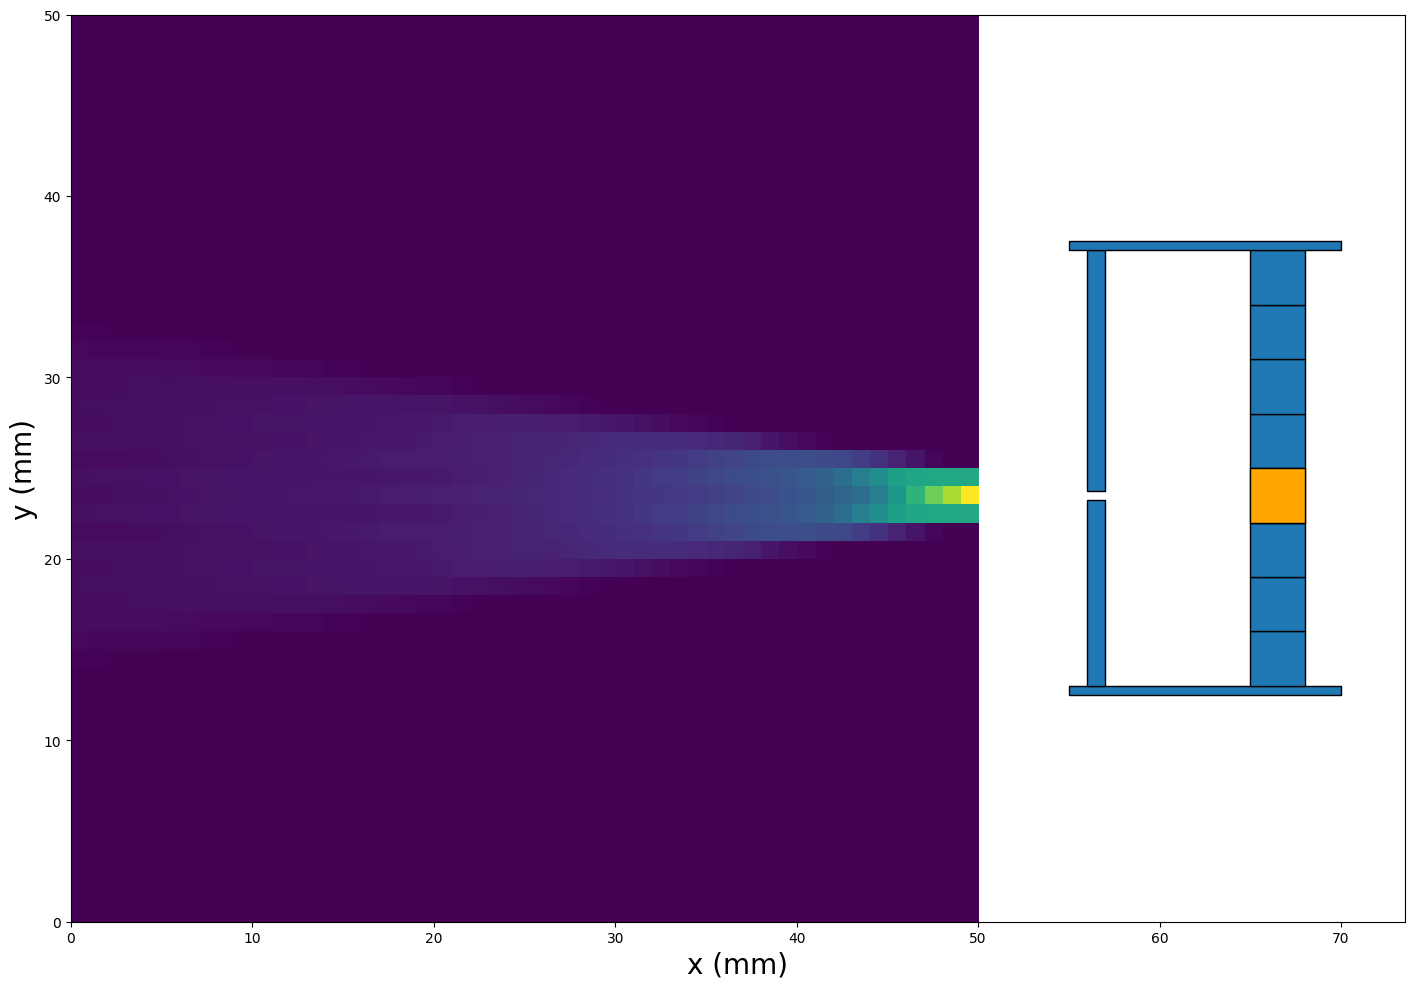

In [14]:
geoms=systemGeom
detectors = geoms
# print(target_indices)
targets = []
for index in sensGeomIds:
    targets.append(detectors[np.nonzero(detectors[:, 6] == index)].flatten())
targets = np.array(targets)
# print(targets)
det_xy = np.array(
    [detectors[:, 0] + x_shift + trans_x, detectors[:, 2] - y_shift + trans_y]
).T
det_inc_xy = np.array(
    [(detectors[:, 1] - detectors[:, 0]), (detectors[:, 3] - detectors[:, 2])]
).T

targets = sensGeom

targets_xy = np.array(
    [targets[:, 0] + x_shift + trans_x, targets[:, 2] - y_shift + trans_y]
).T
targets_inc_xy = np.array(
    [targets[:, 1] - targets[:, 0], targets[:, 3] - targets[:, 2]]
).T

target_rect_list = [
    Rectangle(xy, inc_xy[0], inc_xy[1])
    for xy, inc_xy in zip(targets_xy, targets_inc_xy)
]
rect_list = [
    Rectangle(xy, inc_xy[0], inc_xy[1]) for xy, inc_xy in zip(det_xy, det_inc_xy)
]
pc = PatchCollection(rect_list, ec="black")
fig, ax = plt.subplots(figsize=(16, 10))
im_extent = (0, imageNxyz[0], 0, imageNxyz[1])
im=ax.imshow(matxymap[0],origin="lower", extent=im_extent, aspect="equal")
pc = PatchCollection(rect_list, ec="black")
targets_pc = PatchCollection(target_rect_list, ec="black", fc="orange")
ax.add_collection(pc)
ax.add_collection(targets_pc)
# ax.set_xticks(np.arange(1, 14, 3))
# ax.set_xticklabels(np.arange(1, 14, 3), size=20)
# ax.set_yticks(np.arange(0, 25, 3))
# ax.set_yticklabels(np.arange(0, 25, 3), size=20)
ax.set_xlabel("x (mm)", size=20)
ax.set_ylabel("y (mm)", size=20)
ax.plot(1, 1)
# ax.grid()
ax.set(aspect="equal")
plt.tight_layout()

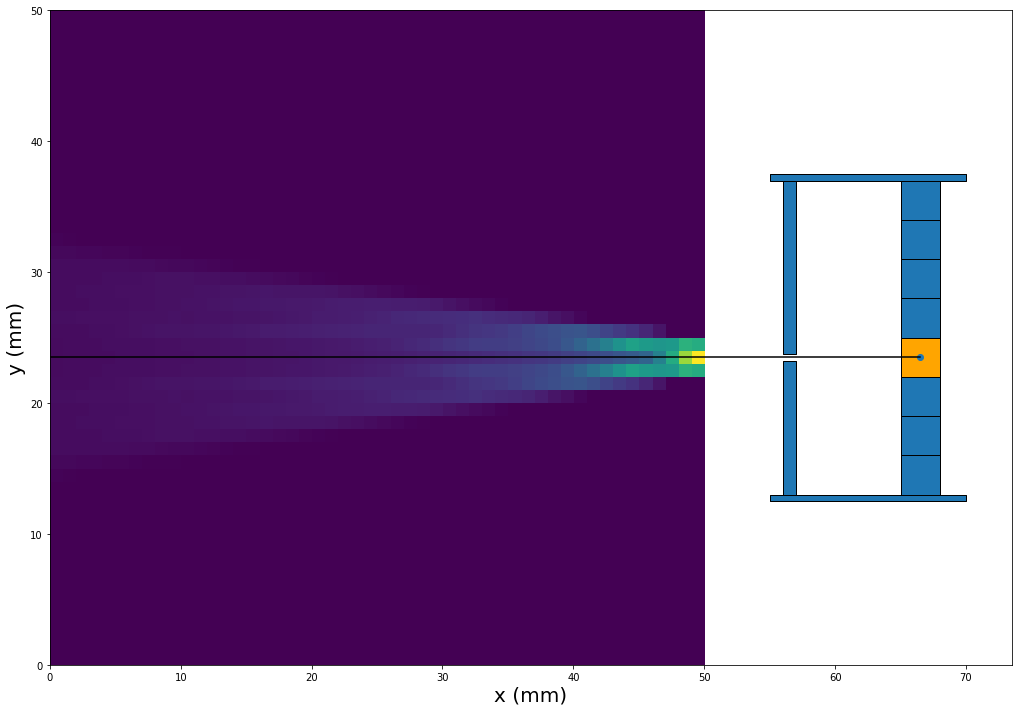

In [5]:
target_c = np.array([
    (targets[0, 0] + targets[0, 1]) * 0.5 + x_shift + trans_x,
    (targets[0, 2] + targets[0, 3]) * 0.5 - y_shift + trans_y,
])
fig, ax = plt.subplots(figsize=(16, 10))
im_extent = (0, imageNxyz[0], 0, imageNxyz[1])
im=ax.imshow(matxymap[0],origin="lower", extent=im_extent, aspect="equal")
pc = PatchCollection(rect_list, ec="black")
targets_pc = PatchCollection(target_rect_list, ec="black", fc="orange")
ax.add_collection(pc)
ax.add_collection(targets_pc)
# ax.set_xticks(np.arange(1, 14, 3))
# ax.set_xticklabels(np.arange(1, 14, 3), size=20)
# ax.set_yticks(np.arange(0, 25, 3))
# ax.set_yticklabels(np.arange(0, 25, 3), size=20)
ax.set_xlabel("x (mm)", size=20)
ax.set_ylabel("y (mm)", size=20)
ax.scatter(target_c[0], target_c[1])
ax.plot([0,target_c[0]],[23.5,target_c[1]],color='black')
# ax.grid()
ax.set(aspect="equal")
plt.tight_layout()


2.670353755551324
0.2827433388230814


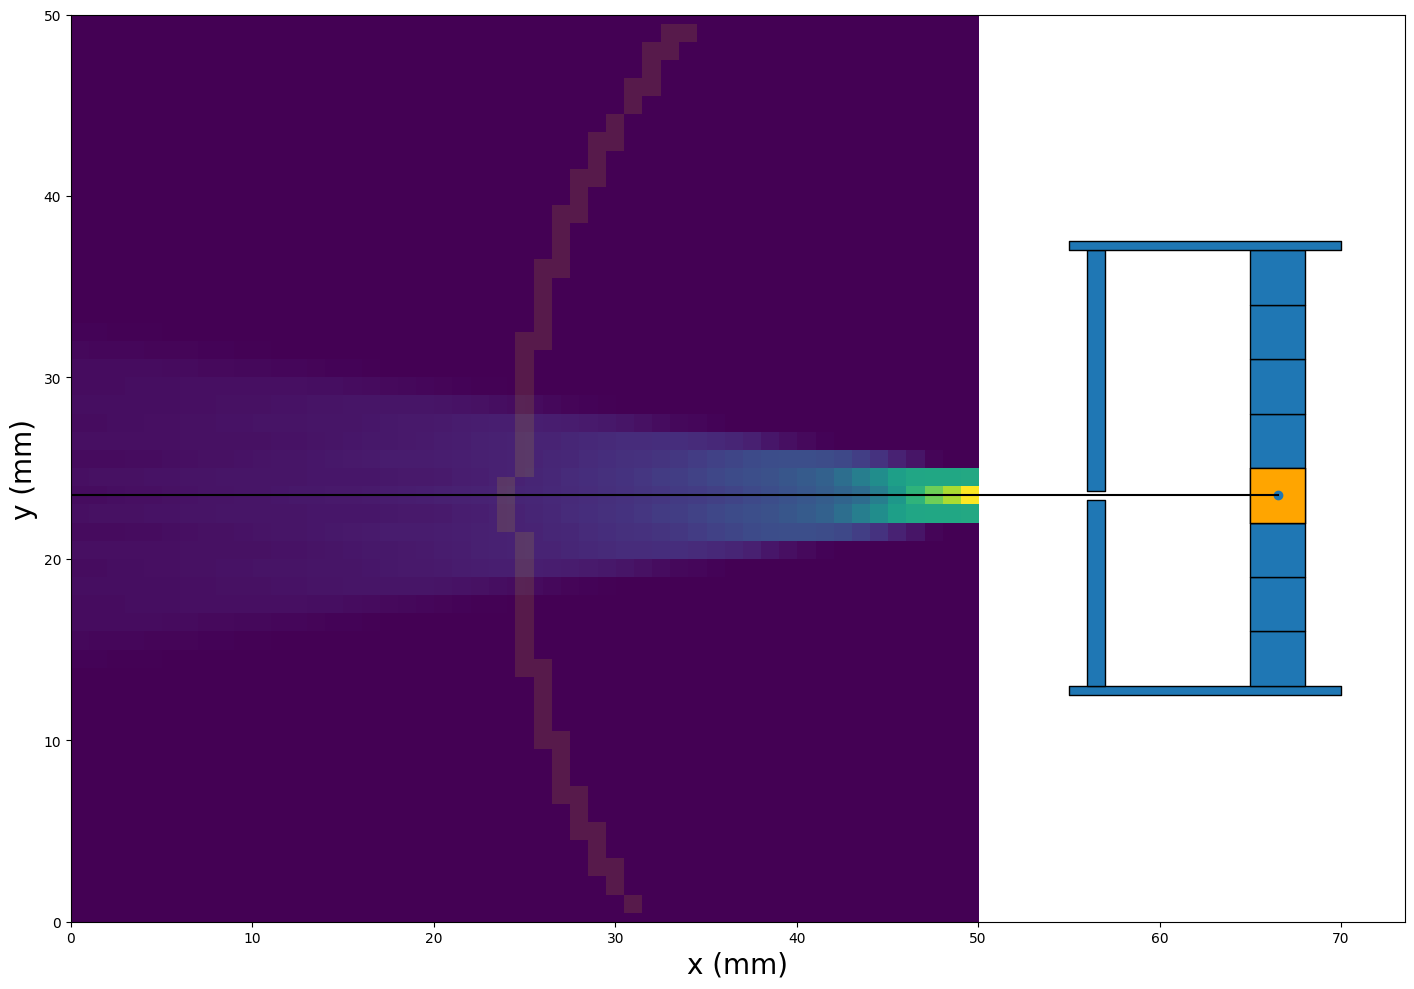

In [15]:
fig, ax = plt.subplots(figsize=(16, 10))
im_extent = (0, imageNxyz[0], 0, imageNxyz[1])
im=ax.imshow(matxymap[0],origin="lower", extent=im_extent, aspect="equal")
pc = PatchCollection(rect_list, ec="black")
targets_pc = PatchCollection(target_rect_list, ec="black", fc="orange")
ax.add_collection(pc)
ax.add_collection(targets_pc)
# ax.set_xticks(np.arange(1, 14, 3))
# ax.set_xticklabels(np.arange(1, 14, 3), size=20)
# ax.set_yticks(np.arange(0, 25, 3))
# ax.set_yticklabels(np.arange(0, 25, 3), size=20)
ax.set_xlabel("x (mm)", size=20)
ax.set_ylabel("y (mm)", size=20)
ax.scatter(target_c[0], target_c[1])
ax.plot([0,target_c[0]],[23.5,target_c[1]],color='black')
# ax.grid()
ax.set(aspect="equal")
plt.tight_layout()
plt.savefig("ppdf.png")
n_angles = 1000
hist_arr = []
pre_x_idx = 0
pre_y_idx = 0
thetas = []
start_angle = 2.4
end_angle = 4.5
print(np.pi*0.85)
print(np.pi*0.09)
radius_det=np.linalg.norm(target_c-[25,25])
for theta in np.arange(start_angle,end_angle,np.pi/n_angles):
    y_cord = radius_det*np.sin(theta) + target_c[1]
    x_cord = radius_det*np.cos(theta) + target_c[0]
    x_idx = int(np.floor(x_cord))
    y_idx = int(np.floor(y_cord))
          
    if x_idx > 0 and x_idx < imageNxyz[0] and y_idx > 0 and y_idx < imageNxyz[1]:
        if pre_x_idx != x_idx or pre_y_idx != y_idx:
        # print(x_idx,y_idx)
            hist_arr.append(matxymap[0,y_idx,x_idx])
            thetas.append(theta)
            ax.add_patch(Rectangle((x_idx-0.5, y_idx-0.5), 1.0, 1.0, facecolor='yellow', alpha=0.1))
    pre_x_idx = x_idx
    pre_y_idx = y_idx
signal=np.asarray(hist_arr)
thetas=np.asarray(thetas)
# plt.savefig("angular-proj-diagram.png")

1


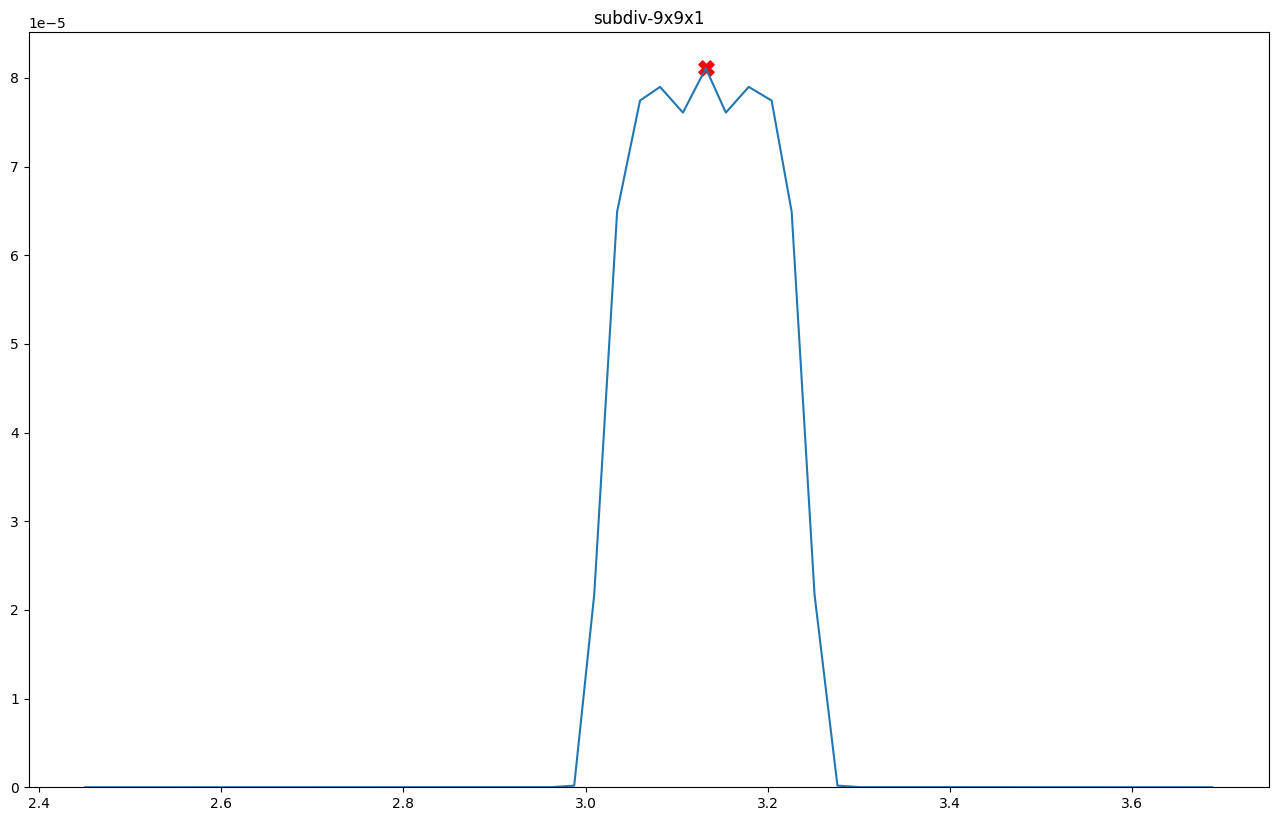

In [38]:
maximum60p=max(signal)*0.6
peaks, peak_prop = find_peaks(signal, height=0, prominence= maximum60p)
plt.rcParams["figure.figsize"] = (16,10)
plt.rcParams["figure.dpi"] = 100
fig, ax = plt.subplots()
ax.plot(thetas,signal)
ax.scatter(thetas[peaks], signal[peaks],marker="X",s=120,color="r")
ax.set_title(identifier)
# ymin,ymax = ax.get_ylim()
ax.set_ylim(0)
print(len(peaks))